In [1]:
# load the data 
using JLD: load
rats=load("experiment.jld");
 rats = rats["rats"] ;

In [2]:
# define all relevant variables 
numberofrats=rats.featuresexperiment[1];
numberofdays=rats.featuresexperiment[2];
numberoftrials=rats.featuresexperiment[3];

dt=0.1;
R=100.0;
r=5.0;
angles=[-3*pi/4, -2*pi/4, -pi/4, 0, pi/4, 2*pi/4, 3*pi/4, pi];
T=120; # maximal duration of a trial in seconds
σ=0.30*100; # variability of place cell activity, in centimeters
times=collect(0:dt:T+dt);


# Potential positions of the platform : 
Xplatform=[0.3,0,-0.3,0,0.5,-0.5,0.5,-0.5].*R; # in cm
Yplatform=[0,0.3,0,-0.3,0.5,0.5,-0.5,-0.5].*R;# in cm


In [3]:
# define function we will need 

function  placecells(position,centres,width)
# PLACECELLS Calculates the activity of the place cells in the simulation.
#
#	F = PLACECELLS(POSITION,CENTRES,WIDTH) calculates the activity of the place cells
#	in the simulation. The returned vector F is of length N, where N is the number of place
#	cells, and it contains the activity of each place cell given the simulated rat's current
#	POSITION (a 2 element column vector). The activity of the place cells is modelled as a
#	rate-of-fire (i.e. a scalar value) determined by a gaussian function. The CENTRES of the
#	gaussian functions are an argument, and must be a 2 x N matrix containing each place
#	cell's preferred location in 2D space. The WIDTH of the place cell fields must
#	also be provided as a scalar value (all place cells are assumed to have the same
#	width).
#
#	The returned vector, F, must be a N element column vector.
#
#	Code for BIO/NROD08 Assignment 2, Winter 2017
#	Author: Blake Richards, blake.richards@utoronto.ca


# calculate the place cell activity
F = exp.(-sum((repmat(position,1,size(centres,2))-centres).^2,1)/(2*width^2))';
return F
end


placecells (generic function with 1 method)

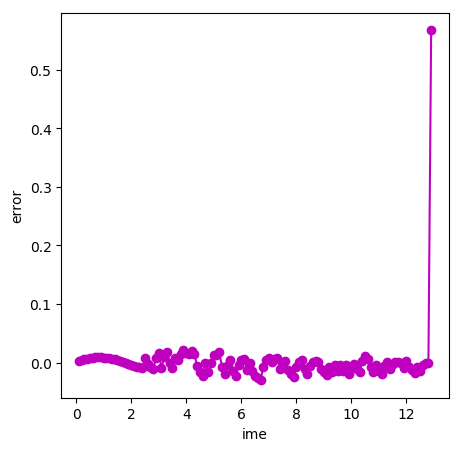

In [4]:
####### PLOT errors OF 1 RAT #######
# chose rat 
indexrat=2;
# chose Day
indexday= 1;
# chose trial
indextrial=6;

# Plot latency 
latencierat=[rats.experiment[1].day[div(k+numberoftrials-1,numberoftrials)].trial[rem(numberoftrials-1+k,numberoftrials)+1].Latency for k in 1:numberoftrials*numberofdays ]
using PyPlot
ioff()
fig = figure("Test plot latencies rat $(indexrat)",figsize=(5,5))
ax = fig[:add_subplot](1,1,1)

xlabel("ime")
ylabel("error")         
plot(dt:dt:rats.experiment[indexrat].day[indexday].trial[indextrial].Latency, rats.experiment[indexrat].day[indexday].trial[indextrial].Error, marker="o",linestyle="-",color="m")
show()


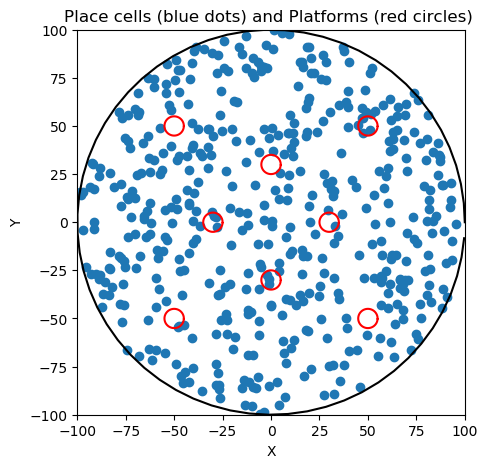

In [4]:
indexrat=1;

Xplacecell=rats.experiment[indexrat].PlaceCells[:,1];
Yplacecell=rats.experiment[indexrat].PlaceCells[:,2];

using PyPlot
ioff()
fig = figure("Test plot place cells",figsize=(5,5))
ax = fig[:add_subplot](1,1,1)
ax[:set_ylim]([-100,100])
ax[:set_xlim]([-100,100])
xlabel("X")
ylabel("Y")
title("Place cells (blue dots) and Platforms (red circles) ")
# place cells centers
scatter(Xplacecell ,Yplacecell)
theta=0:0.1:2*pi;
# Circle contour
plot(R*cos.(theta),R*sin.(theta),"k")
# Different position of platform
for i=1:8
plot(Xplatform[i]+r*cos.(theta),Yplatform[i]+r*sin.(theta),color="r")
end

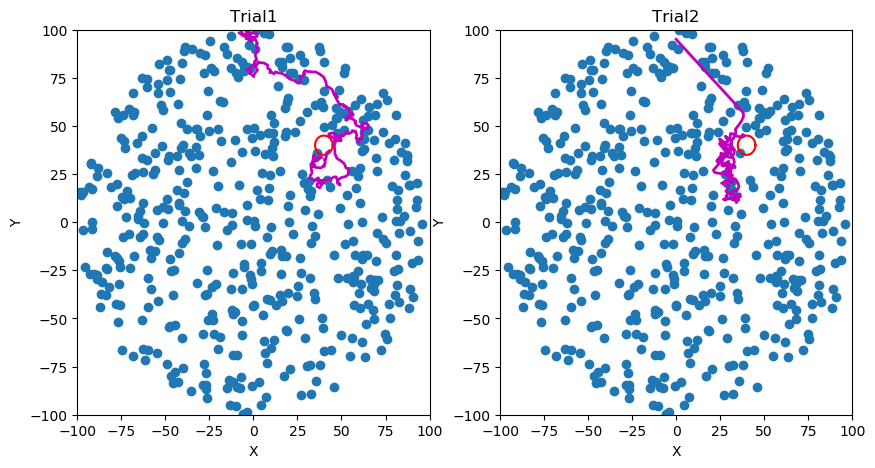

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12b0f9dd0>

In [5]:
# chose rat 
indexrat=1;
# chose Day
indexday= 1;
# chose trial
indextrial1=2;
indextrial2=19;

################## Plotting one trajectories #########
using PyPlot
ioff()
fig = figure("Test plot 2 trajectories",figsize=(10,5))

title("Trajectory at trial $(indextrial1) (left) and $(indextrial2) (right)  ")
ax1 = subplot(121) # Create the 1st axis of a 2x2 arrax of axes
# grid("on") # Create a grid on the axis
title("Trial1") # Give the most recent axis a title
ax1[:set_ylim]([-100,100])
ax1[:set_xlim]([-100,100])
xlabel("X")
ylabel("Y")

scatter(Xplacecell,Yplacecell)

theta=0:0.01:2*pi;
plot(rats.experiment[indexrat].day[indexday].Platform[1]+r*cos.(theta),rats.experiment[indexrat].day[indexday].Platform[2]+r*sin.(theta),color="r")

plot(rats.experiment[indexrat].day[indexday].trial[indextrial1].Trajectory[:,1],rats.experiment[indexrat].day[indexday].trial[indextrial1].Trajectory[:,2],"m-", lw=2.0)

ax2 = subplot(122) # Create a plot and make it a polar plot, 2nd axis of 2x2 axis grid
title("Trial2")
ax2[:set_ylim]([-100,100])
ax2[:set_xlim]([-100,100])
xlabel("X")
ylabel("Y")
scatter(Xplacecell,Yplacecell)

theta=0:0.01:2*pi;
plot(rats.experiment[indexrat].day[indexday].Platform[1]+r*cos.(theta),rats.experiment[indexrat].day[indexday].Platform[2]+r*sin.(theta),color="r")

plot(rats.experiment[indexrat].day[indexday].trial[indextrial2].Trajectory[:,1],rats.experiment[indexrat].day[indexday].trial[indextrial2].Trajectory[:,2],"m-", lw=2.0)


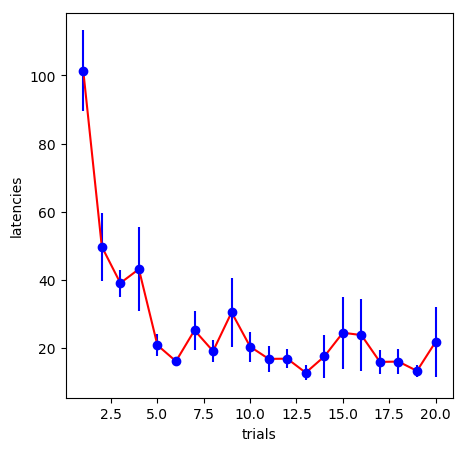

In [6]:

####### PLOT LATENCIES ##### 

using PyPlot
ioff()
fig = figure("Test plot latencies",figsize=(5,5))
ax = fig[:add_subplot](1,1,1)

xlabel("trials")
ylabel("latencies")         


for k=1:numberofdays
    
# Calculate standard deviation 
#err=[std([rats.experiment[n].day[k].trial[i].Latency for n in 1:numberofrats]; corrected=false) for i in 1:numberoftrials] ;

# Calculate the lower value for the error bar : 
uppererror = [std([rats.experiment[n].day[k].trial[i].Latency for n in 1:numberofrats]; corrected=false) for i in 1:numberoftrials]./sqrt(numberofrats) ;
lowererror = [std([rats.experiment[n].day[k].trial[i].Latency for n in 1:numberofrats]; corrected=false) for i in 1:numberoftrials]./sqrt(numberofrats) ;

errs=[lowererror,uppererror];

plot((k-1)*numberoftrials.+(1:numberoftrials), [mean([rats.experiment[n].day[k].trial[i].Latency for n in 1:numberofrats]) for i in 1:numberoftrials ], marker="None",linestyle="-",color="r",label="Base Plot")
  
errorbar((k-1)*numberoftrials.+(1:numberoftrials),[mean([rats.experiment[n].day[k].trial[i].Latency for n in 1:numberofrats]) for i in 1:numberoftrials ],yerr=errs,fmt="o",color="b")

end 
show()

#using Images
#save("/Users/pmxct2/Documents/FosterDayanMorris/latencies_parameters$(rats.parameters).eps",fig)

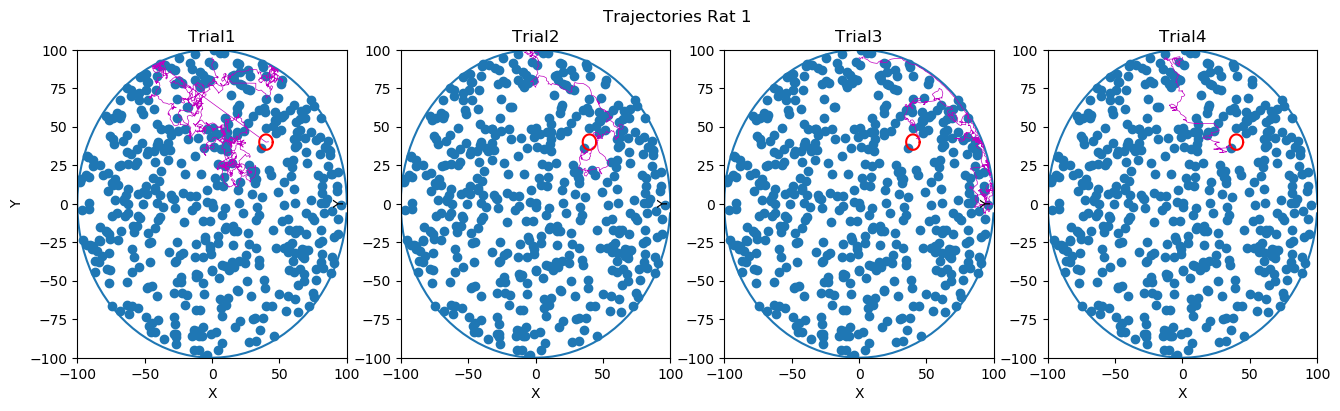

In [7]:


# chose rat 
indexrat=1;
# chose Day
indexday=1;
# chose trial
#indextrial=3;

argument=0:pi/50:2pi;
xplat=r*cos.(argument);
yplat=r*sin.(argument);
xmaze=R*cos.(argument);
ymaze=R*sin.(argument);


#Declare a figure object 
using PyPlot
ioff()
fig = figure("Test plot Trajectory",figsize=(16,4))



ax1 = subplot(141) # Create the 1st axis of a 2x2 arrax of axes
# grid("on") # Create a grid on the axis
title("Trial1") # Give the most recent axis a title
ax1[:set_ylim]([-100,100])
ax1[:set_xlim]([-100,100])
xlabel("X")
ylabel("Y")


# Plot place cells 
scatter(Xplacecell,Yplacecell)
# plot platform
plot(rats.experiment[indexrat].day[indexday].Platform[1]+xplat,rats.experiment[indexrat].day[indexday].Platform[2] + yplat,color="red")

# Plot circle
plot(xmaze,ymaze)

# Plot trajectory 
plot(rats.experiment[indexrat].day[indexday].trial[1].Trajectory[:,1],rats.experiment[indexrat].day[indexday].trial[1].Trajectory[:,2],"m-", lw=0.5)
ax2 = subplot(142) # Create a plot and make it a polar plot, 2nd axis of 2x2 axis grid
title("Trial2")
ax2[:set_ylim]([-100,100])
ax2[:set_xlim]([-100,100])
xlabel("X")
ylabel("Y")

scatter(Xplacecell,Yplacecell)
plot(rats.experiment[indexrat].day[indexday].Platform[1]+xplat,rats.experiment[indexrat].day[indexday].Platform[2] + yplat,color="red")
# Plot circle
plot(xmaze,ymaze)

plot(rats.experiment[indexrat].day[indexday].trial[2].Trajectory[:,1],rats.experiment[indexrat].day[indexday].trial[2].Trajectory[:,2],"m-", lw=0.5)

ax3 = subplot(143) # Create a plot and make it a polar plot, 3rd axis of 2x2 axis grid
title("Trial3")
ax3[:set_ylim]([-100,100])
ax3[:set_xlim]([-100,100])
xlabel("X")
ylabel("Y")

scatter(Xplacecell,Yplacecell)
plot(rats.experiment[indexrat].day[indexday].Platform[1]+xplat,rats.experiment[indexrat].day[indexday].Platform[2] + yplat,color="red")
# Plot circle
plot(xmaze,ymaze)

plot(rats.experiment[indexrat].day[indexday].trial[3].Trajectory[:,1],rats.experiment[indexrat].day[indexday].trial[3].Trajectory[:,2],"m-", lw=0.5)

ax4 = subplot(144) # Create the 4th axis of a 2x2 arrax of axes
# xlabel("This is an X axis")
# ylabel("This is a y axis")
title("Trial4")

ax4[:set_ylim]([-100,100])
ax4[:set_xlim]([-100,100])
xlabel("X")
ylabel("Y")

scatter(Xplacecell,Yplacecell)
plot(rats.experiment[indexrat].day[indexday].Platform[1]+xplat,rats.experiment[indexrat].day[indexday].Platform[2] + yplat,color="red")
# Plot circle
plot(xmaze,ymaze)
plot(rats.experiment[indexrat].day[indexday].trial[4].Trajectory[:,1],rats.experiment[indexrat].day[indexday].trial[4].Trajectory[:,2],"m-", lw=0.5)

# fig[:canvas][:draw]() # Update the figure
suptitle("Trajectories Rat $(indexrat)")

#gcf() # Needed for IJulia to plot inline

show()

#using Images
#save("/Users/pmxct2/Documents/FosterDayanMorris/day$(indexday)rat$(indexrat)_parameters$(rats.parameters).eps",fig)


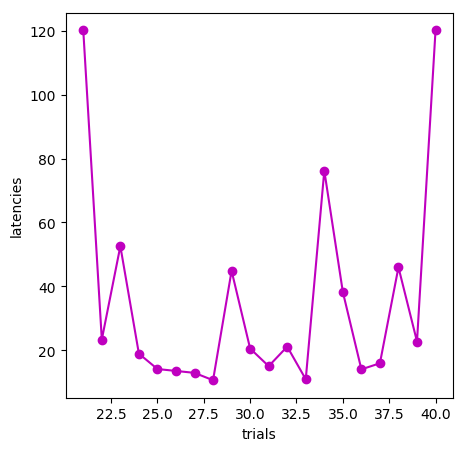

In [8]:
####### PLOT LATENCY OF 1 RAT #######


# chose rat 
indexrat=1;


# Plot latency 
latencierat=[rats.experiment[1].day[div(k+numberoftrials-1,numberoftrials)].trial[rem(numberoftrials-1+k,numberoftrials)+1].Latency for k in 1:numberoftrials*numberofdays ]
using PyPlot
ioff()
fig = figure("Test plot latencies rat $(indexrat)",figsize=(5,5))
ax = fig[:add_subplot](1,1,1)

xlabel("trials")
ylabel("latencies")         

 
for k=1:numberofdays
plot(k*numberoftrials.+(1:numberoftrials), [rats.experiment[indexrat].day[k].trial[i].Latency for i in 1:numberoftrials ], marker="o",linestyle="-",color="m")

end 
show()

#using Images
#save("/Users/pmxct2/Documents/FosterDayanMorris/latency_rats$(indexrat)_parameters$(rats.parameters).eps",fig)


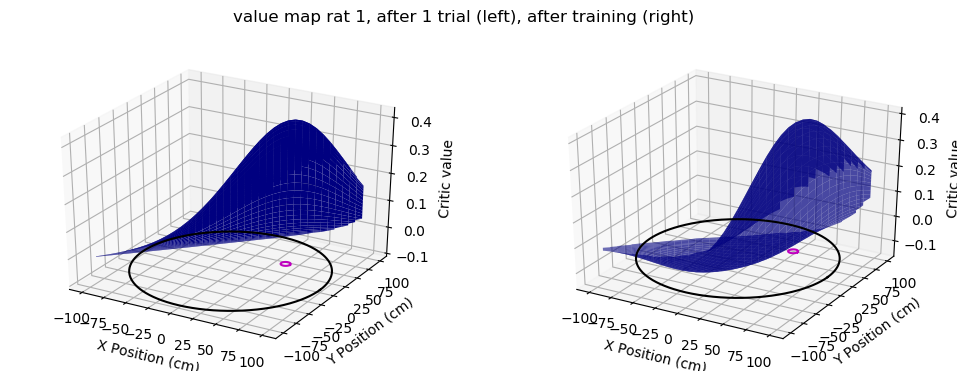

/Users/pmxct2/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


In [9]:
# Plot value map at the beginning and at the end 

# chose rat 

indexrat=1;

centres=transpose([rats.experiment[indexrat].PlaceCells[:,1] rats.experiment[indexrat].PlaceCells[:,2]]);

# establish the grid of points in the pool
x=[-R+5(k-1) for k=1:floor(2*R/5)];
y=transpose(x);
x2=x;
y2=y;

# initalize the valu map variable
vbegin = zeros(length(x),length(x));
vend = zeros(length(x),length(x));

Wbegin=rats.experiment[indexrat].day[1].trial[1].Valuemap;
Wend=rats.experiment[indexrat].day[1].trial[numberoftrials].Valuemap;

# for each place point in the grid, calculate the critic value
for i = 1:length(x)
    for j = 1:length(x)

        # make sure the point is in the pool
        if sqrt((x[i]^2+y[j]^2)) < R
        
            # determine the place cell activity at this point
            F = placecells([x[i],y[j]],centres,σ)           
            # determine the actor activity
            vbegin[i,j] = dot(Wbegin,F);
            vend[i,j] = dot(Wend,F);
        else
            vbegin[i,j] = NaN;
            vend[i,j] = NaN;
        end
    end
end

# Plot value function : 
 using PyPlot



# create the figure 
fig = figure("Test plot value map rat $(indexrat), after 1 trial",figsize=(12,4));

subplot(121, projection="3d")
# show the value map
s1 = surf(x,y,vbegin,cmap=ColorMap("jet"));
plot(R*cos.(theta),R*sin.(theta),-0.1,"k-")
plot(rats.experiment[indexrat].day[1].Platform[1]+r*cos.(theta),rats.experiment[indexrat].day[1].Platform[2]+r*sin.(theta),-0.1,"m-")


xlabel("X Position (cm)");
ylabel("Y Position (cm)");
zlabel("Critic value");


subplot(122, projection="3d")
suptitle("value map rat $(indexrat), after 1 trial (left), after training (right)")

# show the value map
s2 = surf(x2,y2,vend,cmap=ColorMap("jet"), alpha=0.7);
plot(R*cos.(theta),R*sin.(theta),-0.1,"k-")
plot(rats.experiment[indexrat].day[1].Platform[1]+r*cos.(theta),rats.experiment[indexrat].day[1].Platform[2]+r*sin.(theta),-0.1,"m-")
fig[:canvas][:draw]()

xlabel("X Position (cm)");
ylabel("Y Position (cm)");
zlabel("Critic value");



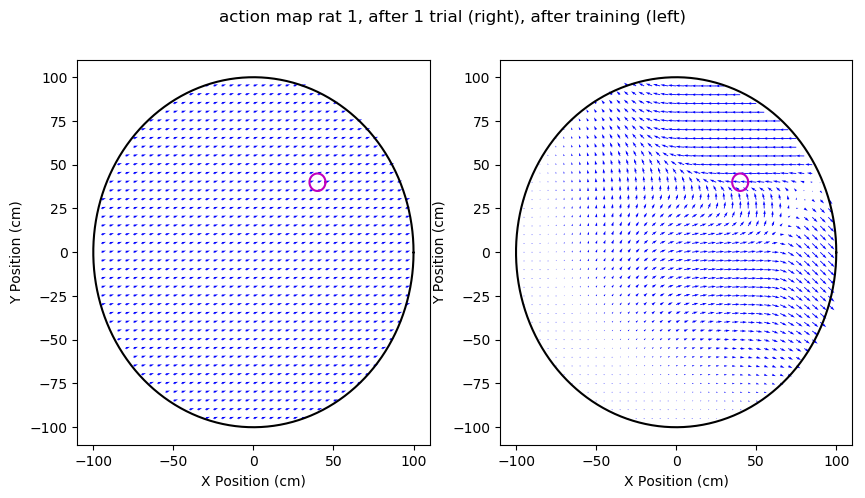

In [10]:
## Plot action map 

# initalize the vectors of action directions
actvec = [cos.(angles) sin.(angles)]

# establish the grid of points in the pool
x=[-R+5(k-1) for k=1:floor(2*R/5)];
y=transpose(x);

# initalize the vector map variables
ubegin = zeros(length(x),length(x));
vbegin = zeros(length(x),length(x));
uend = zeros(length(x),length(x));
vend = zeros(length(x),length(x));

zbegin=rats.experiment[indexrat].day[1].trial[1].ActionMap;
zend=rats.experiment[indexrat].day[1].trial[numberoftrials].ActionMap;

# for each place point in the grid, calculate the vector of preferred action direction
for i = 1:length(x)
    for j = 1:length(x)
        # make sure the point is in the pool
        if sqrt((x[i]^2+y[j]^2)) < R
        
            # determine the place cell activity at this point
            actplacecell = placecells([x[i];y[j]],centres,σ);
            
             #  Compute action cell activity    
             actactioncellend=transpose(zend)*actplacecell; 
            
             #  Compute action cell activity    
             actactioncellbegin=transpose(zbegin)*actplacecell; 
        
             if maximum(actactioncellbegin)>=100 
                 actactioncellbegin=100.*actactioncellbegin./maximum(actactioncellbegin); 
                elseif maximum(actactioncellend)>=100
                actactioncellend=100.*actactioncellend./maximum(actactioncellend); 
             end
             
            # Compute probability distribution : 
            Pactioncellbegin=exp.(2.*actactioncellbegin)./sum(exp.(2.*actactioncellbegin)); 
            Pactioncellend=exp.(2.*actactioncellend)./sum(exp.(2.*actactioncellend)); 
            
            
            # determine the weighted action vector
            wavbegin = sum([Pactioncellbegin.*actvec[:,1] Pactioncellbegin.*actvec[:,2]],1);
            wavend = sum([Pactioncellend.*actvec[:,1] Pactioncellend.*actvec[:,2]],1);
            # store the result in u and v
            ubegin[i,j] = 5*wavbegin[1];
            vbegin[i,j] = 5*wavbegin[2];
            uend[i,j] = 5*wavend[1];
            vend[i,j] = 5*wavend[2];
        else
            #x[i] = NaN;
            #y[j] = NaN;
            ubegin[i,j]= NaN;
            vbegin[i,j] = NaN;
            uend[i,j]= NaN;
            vend[i,j] = NaN;
        end
    end
end


# Plot value function : 
 using PyPlot
# create the figure 
fig = figure("Test plot action map rat $(indexrat), after 1 trial",figsize=(10,5));
suptitle("action map rat $(indexrat), after 1 trial (right), after training (left)")

subplot(121)
plot(R*cos.(theta),R*sin.(theta),"k-")
plot(rats.experiment[indexrat].day[1].Platform[1]+r*cos.(theta),rats.experiment[indexrat].day[1].Platform[2]+r*sin.(theta),"m-")
quiver(x,y,ubegin,vbegin,color="b");
xlabel("X Position (cm)");
ylabel("Y Position (cm)");

#xlim([-R-5 R+5]);
#ylim([-R-5 R+5]);


subplot(122)
plot(R*cos.(theta),R*sin.(theta),"k-")
plot(rats.experiment[indexrat].day[1].Platform[1]+r*cos.(theta),rats.experiment[indexrat].day[1].Platform[2]+r*sin.(theta),"m-")
quiver(x,y,uend,vend,color="b");
xlabel("X Position (cm)");
ylabel("Y Position (cm)");

#xlim([-R-5 R+5]);
#ylim([-R-5 R+5]);




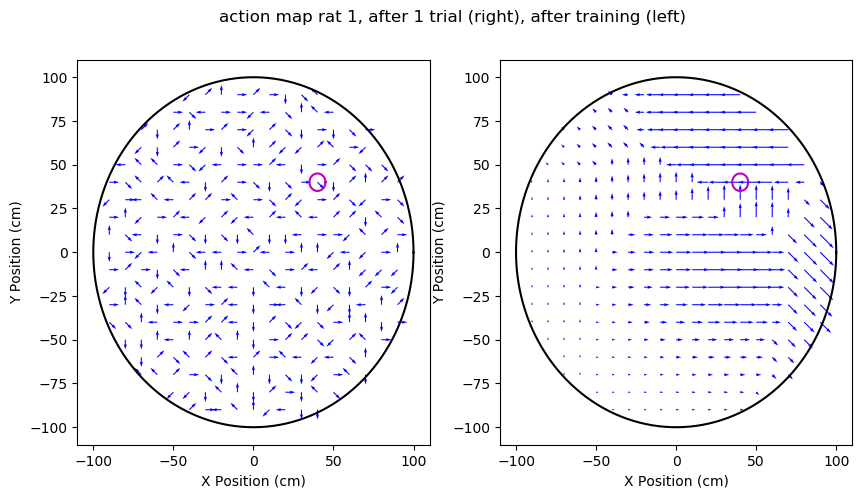

In [11]:
## Plot action map 

# initalize the vectors of action directions
actvec = [cos.(angles) sin.(angles)]

# establish the grid of points in the pool
x=[-R+10(k-1) for k=1:floor(2*R/10)];
y=transpose(x);

# initalize the vector map variables
ubegin = zeros(length(x),length(x));
vbegin = zeros(length(x),length(x));
uend = zeros(length(x),length(x));
vend = zeros(length(x),length(x));

zbegin=rats.experiment[indexrat].day[1].trial[1].ActionMap;
zend=rats.experiment[indexrat].day[1].trial[numberoftrials].ActionMap;

# for each place point in the grid, calculate the vector of preferred action direction
for i = 1:length(x)
    for j = 1:length(x)
        # make sure the point is in the pool
        if sqrt((x[i]^2+y[j]^2)) < R
        
            # determine the place cell activity at this point
            actplacecell = placecells([x[i];y[j]],centres,σ);
            
             #  Compute action cell activity    
             actactioncellend=transpose(zend)*actplacecell; 
            
             #  Compute action cell activity    
             actactioncellbegin=transpose(zbegin)*actplacecell; 
        
             if maximum(actactioncellbegin)>=100 
                 actactioncellbegin=100.*actactioncellbegin./maximum(actactioncellbegin); 
                elseif maximum(actactioncellend)>=100
                actactioncellend=100.*actactioncellend./maximum(actactioncellend); 
             end
             
     
            # Compute probability distribution : 
            Pactioncellbegin=exp.(2.*actactioncellbegin)./sum(exp.(2.*actactioncellbegin)); 
            Pactioncellend=exp.(2.*actactioncellend)./sum(exp.(2.*actactioncellend)); 
            prefereddirbegin=find(x->x==maximum(Pactioncellbegin),Pactioncellbegin)
            prefereddirend=find(x->x==maximum(Pactioncellend),Pactioncellend);

            if !(length(prefereddirbegin)==1)
                prefereddirbegin=rand(1:8)
            end
            
            if !(length(prefereddirend)==1)
                prefereddirend=rand(1:8)
            end
            
            wavbegin = [Pactioncellbegin[prefereddirbegin].*actvec[prefereddirbegin,1] Pactioncellbegin[prefereddirbegin].*actvec[prefereddirbegin,2]]
            wavend = [Pactioncellend[prefereddirend].*actvec[prefereddirend,1] Pactioncellend[prefereddirend].*actvec[prefereddirend,2]];
 
            # store the result in u and v
            ubegin[i,j] = 10*wavbegin[1];
            vbegin[i,j] = 10*wavbegin[2];
            uend[i,j] = 10*wavend[1];
            vend[i,j] = 10*wavend[2];
        else
            #x[i] = NaN;
            #y[j] = NaN;
            ubegin[i,j]= NaN;
            vbegin[i,j] = NaN;
            uend[i,j]= NaN;
            vend[i,j] = NaN;
        end
    end
end


# Plot value function : 
 using PyPlot
# create the figure 
fig = figure("Test plot action map rat $(indexrat), after 1 trial",figsize=(10,5));
suptitle("action map rat $(indexrat), after 1 trial (right), after training (left)")

subplot(121)
plot(R*cos.(theta),R*sin.(theta),"k-")
plot(rats.experiment[indexrat].day[1].Platform[1]+r*cos.(theta),rats.experiment[indexrat].day[1].Platform[2]+r*sin.(theta),"m-")
quiver(x,y,ubegin,vbegin,color="b");
xlabel("X Position (cm)");
ylabel("Y Position (cm)");

#xlim([-R-5 R+5]);
#ylim([-R-5 R+5]);


subplot(122)
plot(R*cos.(theta),R*sin.(theta),"k-")
plot(rats.experiment[indexrat].day[1].Platform[1]+r*cos.(theta),rats.experiment[indexrat].day[1].Platform[2]+r*sin.(theta),"m-")
quiver(x,y,uend,vend,color="b");
xlabel("X Position (cm)");
ylabel("Y Position (cm)");

#xlim([-R-5 R+5]);
#ylim([-R-5 R+5]);


